In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
%matplotlib inline
pd.set_option("display.max_columns",None)

## Data description
1. classes: edible=e, poisonous=p)
2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
5. bruises: bruises=t,no=f
6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
7. gill-attachment: attached=a,descending=d,free=f,notched=n
8. gill-spacing: close=c,crowded=w,distant=d
9. gill-size: broad=b,narrow=n
10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
11. stalk-shape: enlarging=e,tapering=t
12. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
17. veil-type: partial=p,universal=u
18. veil-color: brown=n,orange=o,white=w,yellow=y
19. ring-number: none=n,one=o,two=t
20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
22. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
23. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## EDA

1. Check data info and its type
2. Check NaN values
3. Check data is balanced or not
4. Check the count of features
5. Relationship with output features
6. Check correlation

In [3]:
#Loading dataset
df = pd.read_csv("data_given/mushrooms.csv")

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [11]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
#Checking null values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

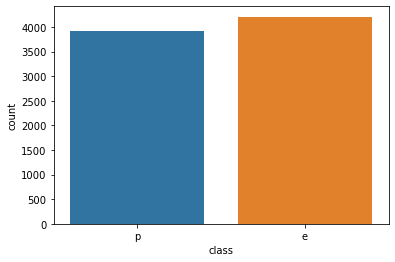

In [15]:
#Let's check the dataset whether it's a balanced dataset or imbalanced
sns.countplot(x= "class", data=df);

##### Observation:
1. All the columns are categorical
2. There is no missing values
3. The dataset is balanced dataset

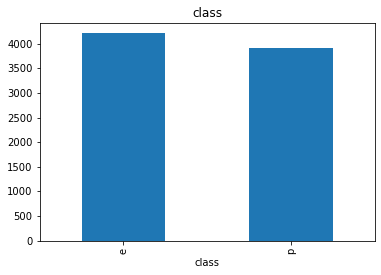

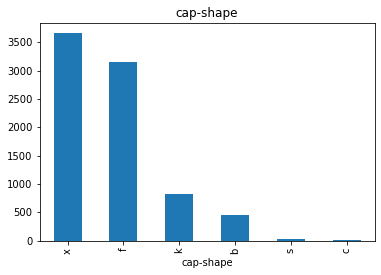

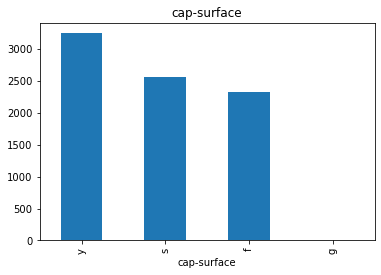

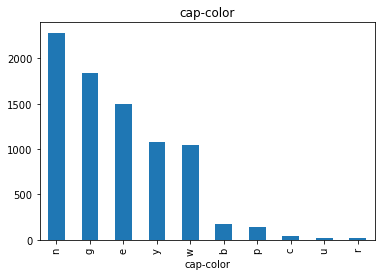

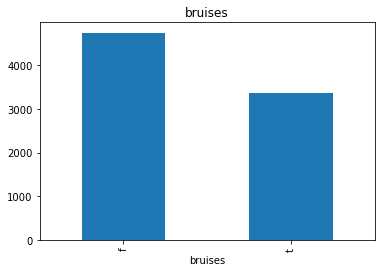

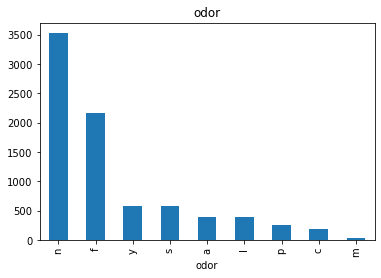

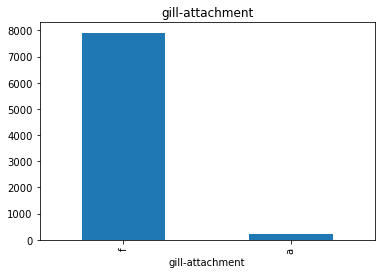

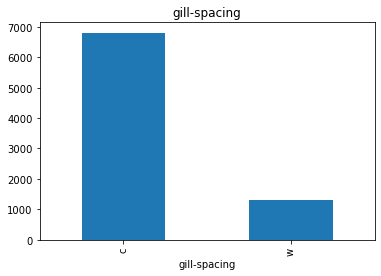

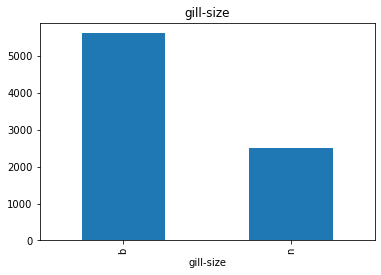

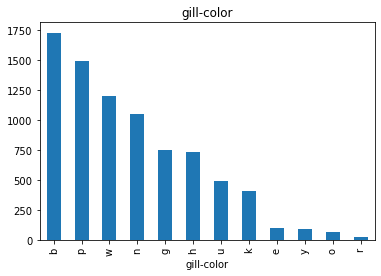

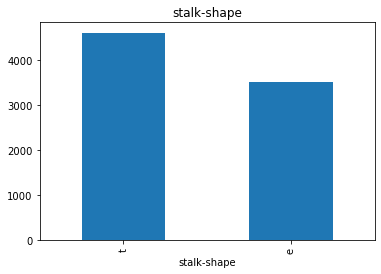

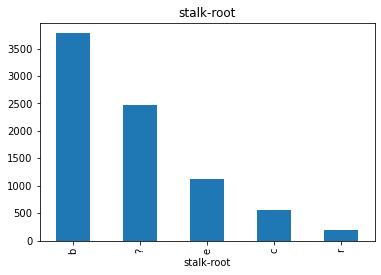

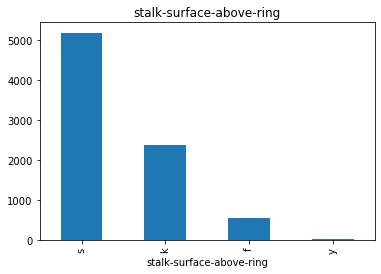

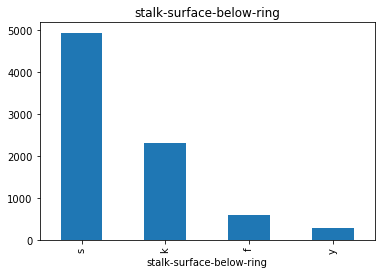

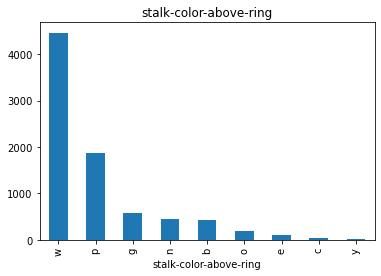

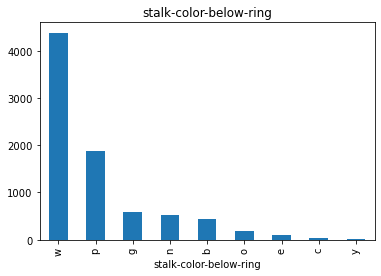

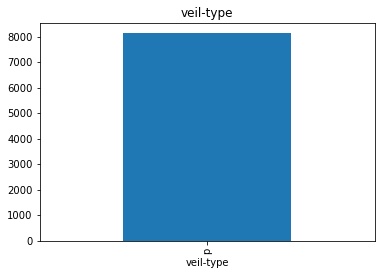

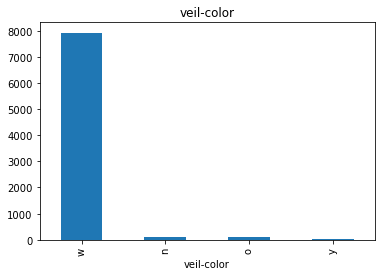

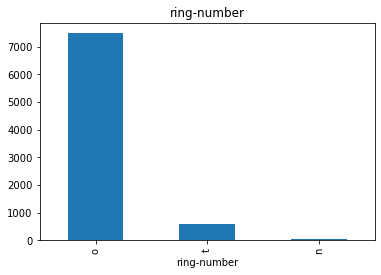

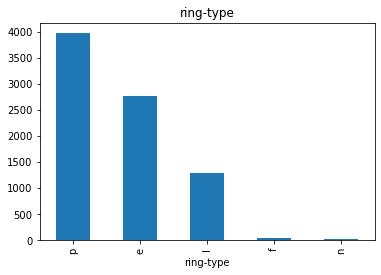

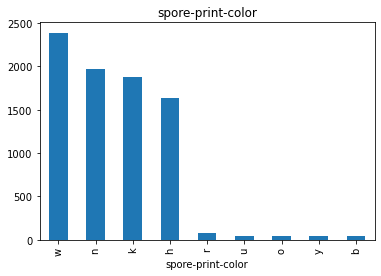

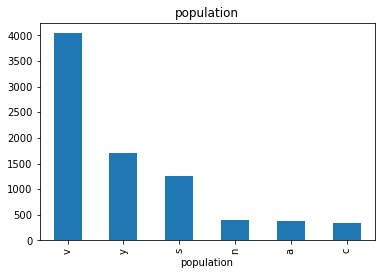

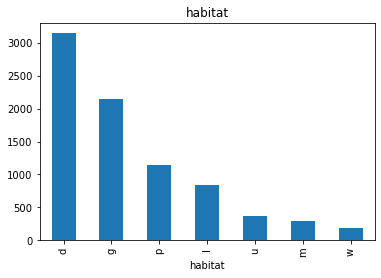

In [18]:
#Creating barplot for checking the unique values in each column and there counts
for feat in df.columns:
    df[feat].value_counts().plot(kind="bar")
    plt.title(feat)
    plt.xlabel(feat)
    print('\n')
    plt.show()

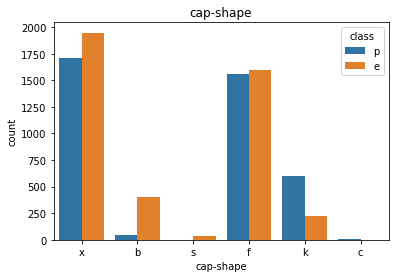

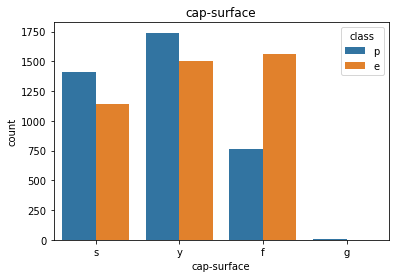

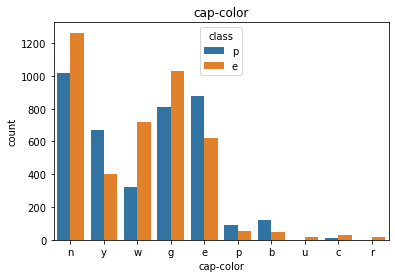

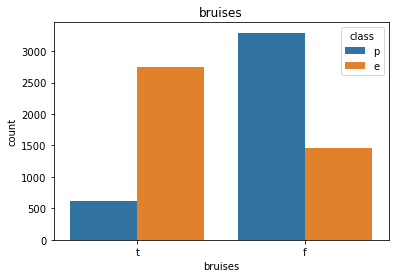

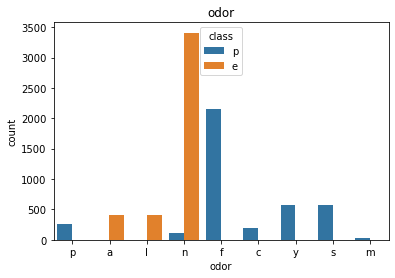

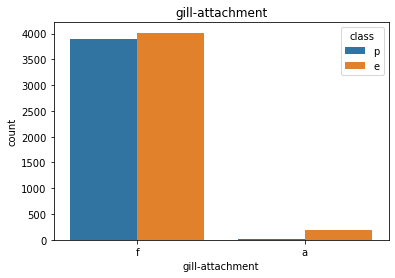

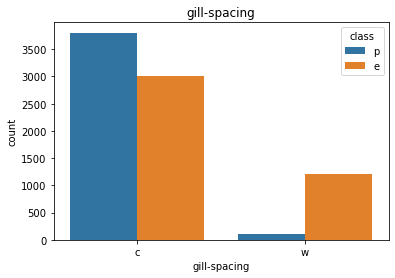

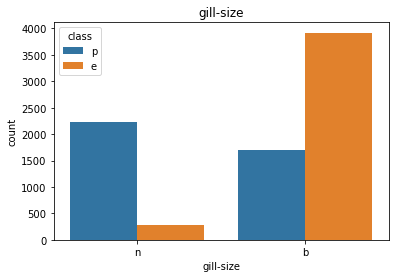

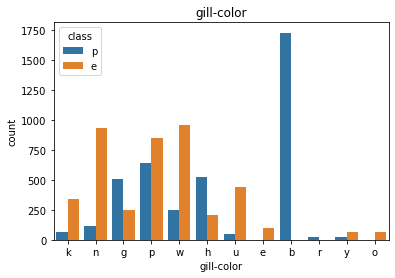

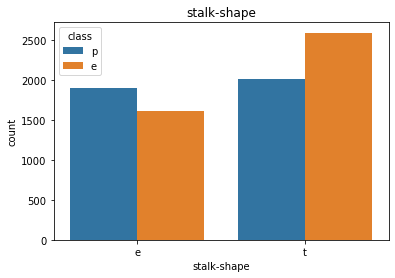

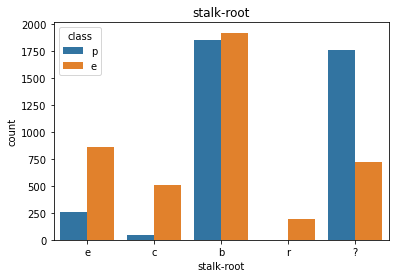

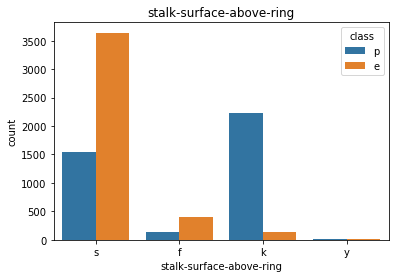

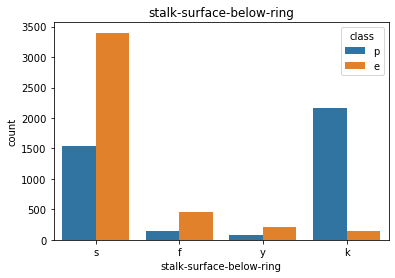

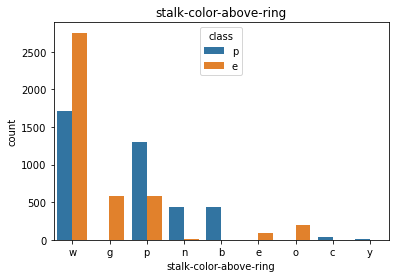

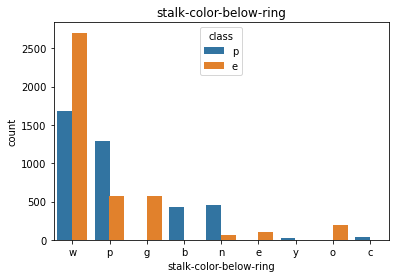

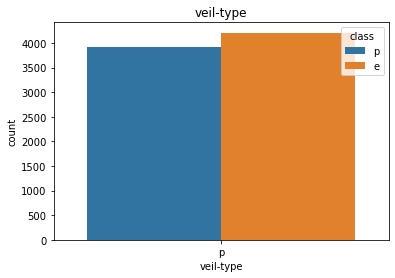

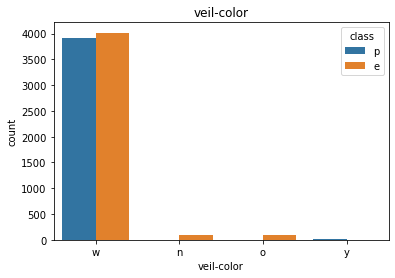

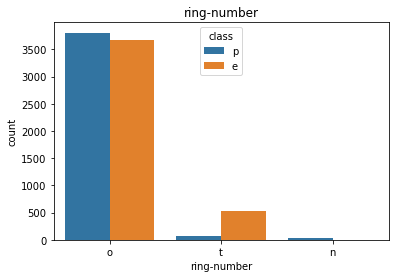

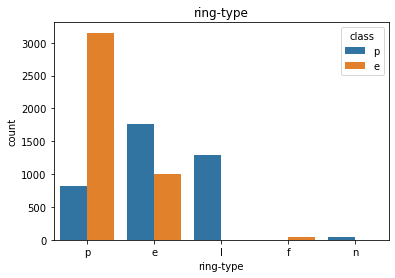

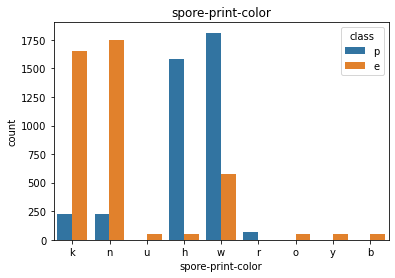

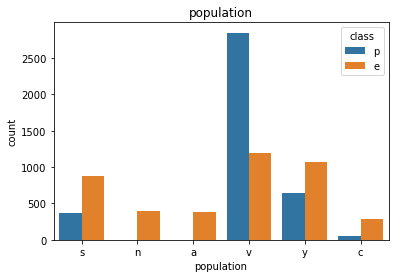

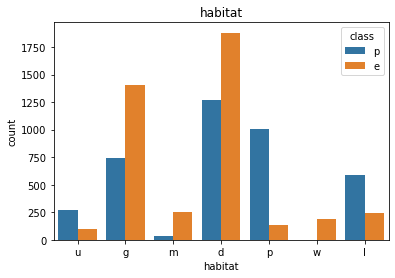

In [19]:
# Now creating countplot with hue="class" class is our output feature

for feat in df.columns:
    if feat not in "class":
        sns.countplot(x=feat, data=df, hue="class")
        plt.title(feat)
        plt.show();

### Observations:-

1. By looking at this plot we can say that every value of each columns is important to check whether the mushroom is edible or not.
2. In veil-type feature there is only one value so we have to drop that column.

In [29]:
# Let's check the correlation because all features are categorical we use phik correlation here
df.phik_matrix()

C:\Users\Abhishek\Desktop\Mushroom_classification\env\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable veil-type for analysis 1. Dropping this column
  warnings.warn(


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.339560,0.294330,0.281663,0.708427,0.931449,0.199636,0.519680,0.749777,0.838625,0.158251,0.333071,0.795807,0.783006,0.522229,0.512312,0.229215,0.129640,0.496840,0.737545,0.665121,0.410200
cap-shape,0.339560,1.000000,0.307257,0.309571,0.353524,0.452134,0.212746,0.108258,0.479438,0.524641,0.424878,0.490409,0.242318,0.168853,0.401862,0.324542,0.337304,0.431363,0.297977,0.460748,0.576710,0.425627
cap-surface,0.294330,0.307257,1.000000,0.360499,0.200454,0.358378,0.314979,0.498024,0.412216,0.506619,0.115339,0.374782,0.350663,0.407656,0.378182,0.385134,0.327879,0.103169,0.270587,0.350068,0.390325,0.353202
cap-color,0.281663,0.309571,0.360499,1.000000,0.280636,0.607339,0.320514,0.517648,0.606414,0.568713,0.756236,0.724176,0.407822,0.495496,0.530818,0.534844,0.242874,0.488048,0.880291,0.545442,0.517833,0.559633
bruises,0.708427,0.353524,0.200454,0.280636,1.000000,0.653013,0.212208,0.452514,0.547950,0.807167,0.154101,0.469883,0.783349,0.774913,0.481338,0.490808,0.199829,0.041795,0.639604,0.606991,0.415869,0.494364
odor,0.931449,0.452134,0.358378,0.607339,0.653013,1.000000,0.260271,0.428422,0.744987,0.700349,0.571841,0.795314,0.583373,0.675120,0.862285,0.859799,0.155551,0.952736,0.846142,0.819423,0.630450,0.597233
gill-attachment,0.199636,0.212746,0.314979,0.320514,0.212208,0.260271,1.000000,0.109049,0.168185,0.926703,0.287100,0.180132,0.139788,0.185772,0.938937,0.938937,0.997512,0.122903,0.204377,0.803236,0.570228,0.406841
gill-spacing,0.519680,0.108258,0.498024,0.517648,0.452514,0.428422,0.109049,1.000000,0.167915,0.416612,0.125016,0.473620,0.628530,0.600232,0.399950,0.374363,0.146029,0.148616,0.236966,0.307347,0.864630,0.505140
gill-size,0.749777,0.479438,0.412216,0.606414,0.547950,0.744987,0.168185,0.167915,1.000000,0.929546,0.329906,0.517399,0.254215,0.225441,0.364941,0.346026,0.169454,0.117523,0.469395,0.652801,0.702558,0.465152
gill-color,0.838625,0.524641,0.506619,0.568713,0.807167,0.700349,0.926703,0.416612,0.929546,1.000000,0.766060,0.727784,0.649711,0.680309,0.731246,0.727520,0.764312,0.723609,0.730589,0.787076,0.780714,0.719181


C:\Users\Abhishek\Desktop\Mushroom_classification\env\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable veil-type for analysis 1. Dropping this column
  warnings.warn(


<AxesSubplot:>

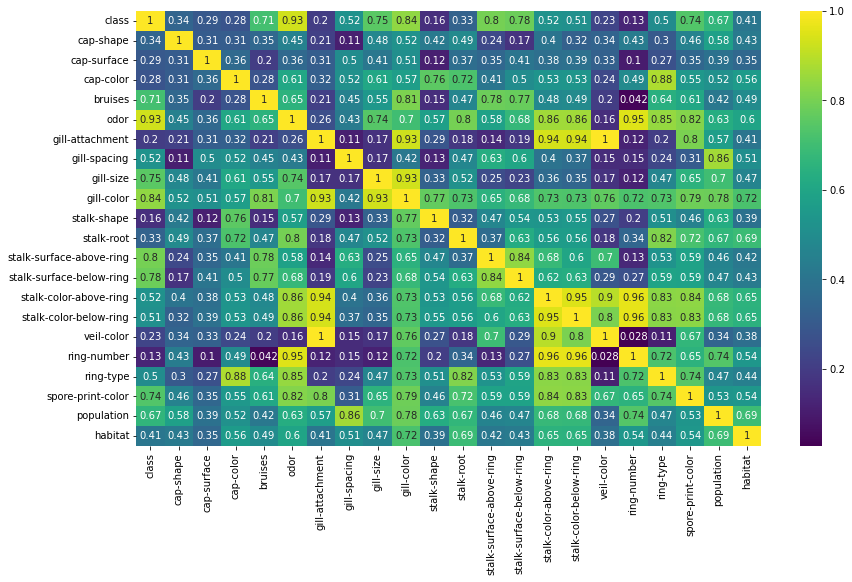

In [31]:
plt.subplots(figsize=(14,8))
sns.heatmap(df.phik_matrix(), annot=True, cmap="viridis")

### Observation:-

1. We can clearly see that lots of features are highly correlated we have to remove all the posive highly correlated features.

## Feature Engineering

1. Drop the feature which have constant variable
2. Drop features which are highly correlated
3. Handle Categorical Columns

In [4]:
df.drop("veil-type",axis=1,inplace=True)

In [5]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g


In [6]:
# before doing correlation we seprate our data into dependent and independent
X = df.drop("class",axis=1)
y = df["class"]

In [7]:
#fuction for taking highly correlated columns
def correlation(data,threshold):
    
    col_corr = set()
    corr_matrix = data.phik_matrix()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) >= threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
                
    return col_corr

In [8]:
correlated_feat = correlation(X,0.85)

In [9]:
len(correlated_feat)

7

In [10]:
# These 7 columns were highly correlated
df[list(correlated_feat)].head()

,population,stalk-color-below-ring,ring-type,ring-number,gill-color,stalk-color-above-ring,veil-color
0,s,w,p,o,k,w,w
1,n,w,p,o,k,w,w
2,n,w,p,o,n,w,w
3,s,w,p,o,n,w,w
4,a,w,e,o,k,w,w


In [11]:
# We'll drop that columns

df.drop(list(correlated_feat),axis=1,inplace=True)

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,spore-print-color,habitat
0,p,x,s,n,t,p,f,c,n,e,e,s,s,k,u
1,e,x,s,y,t,a,f,c,b,e,c,s,s,n,g
2,e,b,s,w,t,l,f,c,b,e,c,s,s,n,m
3,p,x,y,w,t,p,f,c,n,e,e,s,s,k,u
4,e,x,s,g,f,n,f,w,b,t,e,s,s,n,g


#### Handling categorical variables, here we will not use one hot encoding because it will make lots of columns so it's better to handle these categories we'll use label encoding by the help of most frequent category.

In [13]:
df["class"] = df["class"].map({"e":0,"p":1})

In [14]:
df.head(1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,spore-print-color,habitat
0,1,x,s,n,t,p,f,c,n,e,e,s,s,k,u


In [15]:
# for loop, for ordinal encoding to map all the columns by the help of most frequent value
for feat in df.columns:
    if feat not in "class":
        label = df[feat].value_counts().index
        ordinal = {k:i for i,k in enumerate(label,0)}
        df[feat] = df[feat].map(ordinal)

In [16]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,spore-print-color,habitat
0,1,0,1,0,1,6,0,0,1,1,2,0,0,2,4
1,0,0,1,3,1,5,0,0,0,1,3,0,0,1,1
2,0,3,1,4,1,4,0,0,0,1,3,0,0,1,5
3,1,0,0,4,1,6,0,0,1,1,2,0,0,2,4
4,0,0,1,1,0,0,0,1,0,0,2,0,0,1,1


In [17]:
# train test split
X = df.drop("class",axis=1)
y = df["class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [18]:
# importing classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [19]:
log_model = LogisticRegression()
rand_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()

In [20]:
log_model.fit(X_train, y_train)
log_model.score(X_test,y_test)

0.9821538461538462

In [21]:
rand_model.fit(X_train,y_train)
rand_model.score(X_test, y_test)

1.0

In [22]:
knn_model.fit(X_train,y_train)
knn_model.score(X_test,y_test)

1.0

In [23]:
ada_model.fit(X_train,y_train)
ada_model.score(X_test,y_test)

1.0

In [ ]:
R

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
# Randomforest model report
y_preds = rand_model.predict(X_test)
print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[843   0]
 [  0 782]]


In [91]:
# Kneighbors model reports
y_preds = knn_model.predict(X_test)
print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[843   0]
 [  0 782]]


In [92]:
# Adaboost model reports
y_preds = ada_model.predict(X_test)
print(classification_report(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[843   0]
 [  0 782]]


#### All models are working very fine here, except logistic regression every model is giving 100% precent accuracy. So, we'll keep randomforest model.

In [94]:
import pickle
pickle.dump(rand_model, open("mushroom_classification.pkl","wb"))

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [52]:
precision_score(y_test,y_preds)

1.0